# Guided Project: Predicting House Sale Prices
- Building our first linear regression model
- Fitting the model with either OLS or gradient descent. For this project, we are using OLS.
- Select, clean, and transform the features for our model

The data provided is about housing data for the city of Ames, Iowa, US 2006 to 2010. The data was collected for a end-of-semester regression project that can be found [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). **The purpose of this project is to build a linear regression model that accurately predicts the sale prices of the houses.** 

All column info can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

To start off, we'll be creating a pipeline of functions to iterate on different models.
1. transform_features()
2. select_features()
3. train_and_test()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv("AmesHousing.tsv", delimiter="\t")

## Let's familiarize ourselves with the data

In [3]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
housing.info()
# Total of 82 columns, 2930 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [5]:
housing.select_dtypes("number").info()
# 39 numeric columns, majority of them have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Mas Vnr Area       2907 non-null float64
BsmtFin SF 1       2929 non-null float64
BsmtFin SF 2       2929 non-null float64
Bsmt Unf SF        2929 non-null float64
Total Bsmt SF      2929 non-null float64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Bsmt Full Bath     2928 non-null float64
Bsmt Half Bath     2928 non-null float64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      

In [6]:
housing.select_dtypes("object").info()
# 43 columns, Alley, Fireplace Qu, Pool QC, Fence, Misc Features have majority null values
# We will deal with these later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
MS Zoning         2930 non-null object
Street            2930 non-null object
Alley             198 non-null object
Lot Shape         2930 non-null object
Land Contour      2930 non-null object
Utilities         2930 non-null object
Lot Config        2930 non-null object
Land Slope        2930 non-null object
Neighborhood      2930 non-null object
Condition 1       2930 non-null object
Condition 2       2930 non-null object
Bldg Type         2930 non-null object
House Style       2930 non-null object
Roof Style        2930 non-null object
Roof Matl         2930 non-null object
Exterior 1st      2930 non-null object
Exterior 2nd      2930 non-null object
Mas Vnr Type      2907 non-null object
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Foundation        2930 non-null object
Bsmt Qual         2850 non-null object
Bsmt Cond         2850 non-null obje

In [7]:
str_cols = housing.select_dtypes("object").columns

for col in str_cols:
    print("{} COLUMN".format(col))
    print(housing[col].value_counts(dropna=False))
    print("=" * 50)
    
# Familiarizing ourselves with the unique answers for the non-numerical columns
# We will decide on how to deal with these later

MS Zoning COLUMN
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64
Street COLUMN
Pave    2918
Grvl      12
Name: Street, dtype: int64
Alley COLUMN
NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64
Lot Shape COLUMN
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Land Contour COLUMN
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
Utilities COLUMN
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Lot Config COLUMN
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Land Slope COLUMN
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
Neighborhood COLUMN
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide  

## Transforming Features (Numeric columns only)

- Remove features that we don't want to use in the model, just based on the number of missing values or data leakage
    - First we will drop the columns that have more than 25% missing values (this is an arbitrary number)
    - Review the columns for any "leakage" (information outside the dataset being used in the model) (Ex. the year the sale happened)
- Transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
- Create new features by combining other features

We are going to explore each task and then compile everything into 1 function. Let's first look at the percentage of null values.

In [8]:
# Which columns have more than 25% missing values?
perc_null = housing.isnull().sum() / len(housing)
perc_null[perc_null > .25].sort_values(ascending=False)

Pool QC         0.995563
Misc Feature    0.963823
Alley           0.932423
Fence           0.804778
Fireplace Qu    0.485324
dtype: float64

### Which columns have more than 25% missing values?
- `Pool QC`: Indicates the pool quality
- `Misc Feature`: Miscellaneous features not coveredin other categories
- `Alley`: Type of alley access to property
- `Fence`: Indicates fence quality (good privacy to no fence)
- `Fireplace Qu`: Indicates fireplace quality

With these columns, we can expect some to most homes not having these specfic features. So we'll go ahead and drop them.


### Dropping unnecessary columns

Let's explore what columns are not useful to our model. Columns that impose ***data leakage*** and/or no utility such as an index or order number.


#### What is *data leakage*?
There are many forms of data leakage, but in summary, ***data leakage*** is when there is information shared between training and test datasesets AND we don't want any future information to help what we're trying to predict.

For an example, in this model, we are trying to predict the `SalePrice` based on the housing features. Any information relating to this and used in our model will be referred to as a data leakage. 

So, must split the test and train datasets equally and consistently (using random state) and drop the columns that relate to our target.

Full explanation can be found in this [video](https://www.youtube.com/watch?v=yuOOo0FQklQ).

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### What columns are we dropping?
**No utility**
- `Order`
- `PID`
- `Garage Yr Blt` - This is redudant because the garage was built when the house was built, and we have the column `Year Built` for that info.
- `Garage Area` - This is because we have another column `Garage Cars` that shows how many cars can fit in the garage. These 2 columns essentially tell us the same information, so we'll drop 1 of them.

**Data leakage**
- `Mo Sold` 
- `Yr Sold` 
- `Sale Type` 
- `Sale Condition`

After reviewing the definitions of each column, **we'll drop the above columns in our function.**

### Filling in the remainder of the null values

Since we dropped the unnecessary columns and the columns with more than 25% null values, we must inspect the data for more null values.

We'll look only at numeric columns for this step.

In [10]:
numeric_df = housing.select_dtypes("number")

perc_null = numeric_df.isnull().sum() / len(numeric_df)
less_25_null = perc_null[perc_null < 0.25].index

remainder_null = numeric_df[less_25_null].isnull().sum()

remainder_null[remainder_null > 1].sort_values()

Bsmt Full Bath      2
Bsmt Half Bath      2
Mas Vnr Area       23
Garage Yr Blt     159
Lot Frontage      490
dtype: int64

### Which numeric columns are we going to fill?
- `Bsmt Full Bath`
- `Bsmt Half Bath`
- `Mas Vnr Area`
- `Garage Yr Blt`
- `Lot Frontage`

### Creating new features

When given data, sometimes you are able to generate new information with the data given. For an example, we are given `Year Remod/Add` and `Year Built`. With these 2 columns, we can calculate how many years until the house was remodeled. 

We also want to make sure there aren't any miscalculations. To be more specific, if we perform the calculation and have a negative number then that doesn't make sense because the house can't be remodeled before it was originally built.

Now, let's implement `transform_features()` with the information above.

## `transform_features()` Function

In [11]:
def transform_features(data):
    
    # Make a copy so we don't make any edits to original data
    df = data.copy()
    
    # Dropping the columns that have more than 25% null values
    perc_null = df.isnull().sum() / len(df)
    null_columns = perc_null[perc_null > .25].index
    df_no_null = df.drop(null_columns, 
                         axis=1,
                         inplace=True)
    
    # Dropping the useless/leakage columns
    useless_cols = ["Order", "PID", "Garage Yr Blt", "Garage Area"]
    leakage_cols = ["Mo Sold", "Yr Sold", "Sale Type", "Sale Condition"]

    df.drop(useless_cols,
            axis=1,
            inplace=True)
    df.drop(leakage_cols,
            axis=1,
            inplace=True)
    
    # Filling in the null values in the numeric columns with the mean
    fill_null_num_cols = df.select_dtypes("number").columns

    for col in fill_null_num_cols:
        mean = df[col].mean() 
        df[col].fillna(mean,
                       inplace=True)
    
    # Creating new features
    df["years_until_remod"] = df["Year Remod/Add"] - df["Year Built"]
    negative_remod = df[df["years_until_remod"] < 0].index
    df.drop(negative_remod,
            inplace=True)
    
    return df

In [12]:
# Review results
clean_numeric = transform_features(housing)

print("Before housing data shape: {}".format(housing.shape))
print("After housing data shape: {}\n".format(clean_numeric.shape))
print("=" * 50)

clean_numeric.select_dtypes("number").info()


Before housing data shape: (2930, 82)
After housing data shape: (2929, 70)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 2929
Data columns (total 34 columns):
MS SubClass          2929 non-null int64
Lot Frontage         2929 non-null float64
Lot Area             2929 non-null int64
Overall Qual         2929 non-null int64
Overall Cond         2929 non-null int64
Year Built           2929 non-null int64
Year Remod/Add       2929 non-null int64
Mas Vnr Area         2929 non-null float64
BsmtFin SF 1         2929 non-null float64
BsmtFin SF 2         2929 non-null float64
Bsmt Unf SF          2929 non-null float64
Total Bsmt SF        2929 non-null float64
1st Flr SF           2929 non-null int64
2nd Flr SF           2929 non-null int64
Low Qual Fin SF      2929 non-null int64
Gr Liv Area          2929 non-null int64
Bsmt Full Bath       2929 non-null float64
Bsmt Half Bath       2929 non-null float64
Full Bath            2929 non-null int64
Half Bath            2

## Feature Selection

Now we have cleaned the numeric columns, we can start the feature selection for the numeric columns. There are many ways to perform feature selection (some are explained in this [article](https://machinelearningmastery.com/feature-selection-machine-learning-python/)). 

For this model, we will look at Pearson's correlation with the target (`SalePrice`) and keep only the strongly correlated. For this arbitrary number, we will only select features that have a correlation of 0.5 and above with `SalePrice`.

Let's generate a heatmap to see this visually.

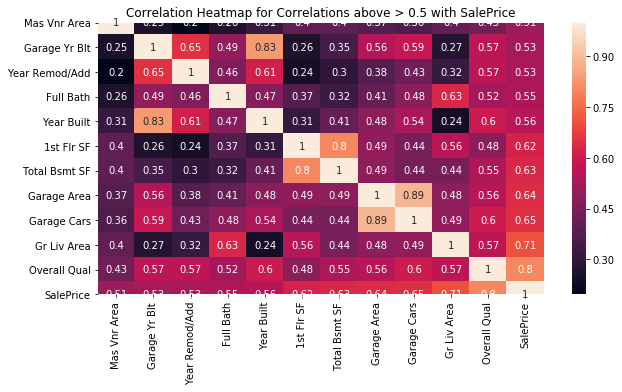

In [13]:
numeric_data = housing.select_dtypes("number")
sorted_corr = abs(numeric_data.corr()["SalePrice"]).sort_values()
strong_corr = sorted_corr[sorted_corr > 0.5].index

corr_matrix = housing[strong_corr].corr()

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Correlations above > 0.5 with SalePrice")

plt.show()

### Which columns are highly correlated with SalePrice?
1. `Overall Qual` - Rates the overall material and finish of the house
2. `Gr Liv Area` - Above grade (ground) living area square feet
3. `Garage Cars/Garage Area` - Size of garage in car capacity
4. `Total Bsmt SF` - Total square feet of basement area
5. `1st Flr SF` - First Floor square feet

**For #3, the Garage Cars and Garage Area columns both represent the same information, so we can go ahead drop the Garage Area because Garage Cars is a bit more intuitive.**

For the model we will compute the RMSE for 1 feature and keep adding 1 feature to see if our model improves. Let's sort the correlation coefficients (from the numeric columns) and select those features.

## `select_features()` Function

In [14]:
def select_features(data):
    
    # Selecting only numeric columns at this point
    numeric_data = data.select_dtypes("number")
    sorted_corr = abs(numeric_data.corr()["SalePrice"]).sort_values(ascending=False)
    sorted_corr.drop("SalePrice",
                     inplace=True)
    features = sorted_corr.index
    
    return features

## `train_and_test()` Function

For now, we will only train and test the model with numerical data. We'll start off with the first numerical column and keep adding 1 column until theres no more. We'll print out what number model, how many features, and the RMSE.

In [15]:
def train_and_test(data):
    
    half = data.shape[0]//2
    
    # Splitting the data in half
    train = data.iloc[:half]
    test = data.iloc[half:]
    
    # Cleaning the features
    train_df = transform_features(train)
    test_df = transform_features(test)
    
    # Selecting the features
    train_features = select_features(train_df)
    test_features = select_features(test_df) 

    
    lr = LinearRegression(normalize=True)
    
    train_list = []
    test_list = []
    
    train_rmse = []
    test_rmse = []
    
    # TRAINING
    for ix in range(len(train_features)):
        train_list.append(train_features[ix])
        lr.fit(train_df[train_list], train_df["SalePrice"])
        train_predictions = lr.predict(train_df[train_list])
        mse = mean_squared_error(train_df["SalePrice"], train_predictions)
        rmse = np.sqrt(mse)
        train_rmse.append(rmse)
        
    # TEST
    for ix in range(len(test_features)):
        test_list.append(test_features[ix])
        lr.fit(test_df[test_list], test_df["SalePrice"])
        test_predictions = lr.predict(test_df[test_list])
        mse = mean_squared_error(test_df["SalePrice"], test_predictions)
        rmse = np.sqrt(mse)
        score = lr.score(test_df[test_list], test_df["SalePrice"])
        test_rmse.append(rmse)
        
        print("Model No. {}".format(ix+1))
        print("No. of features: {}".format(len(test_list)))
        #print("Features: {}".format(test_list))
        print("RMSE: {}".format(rmse))
        print("Score: {}".format(score))
        print("="*50)
        print("\n")
        
    
    return train_rmse, test_rmse

# Review results
train_and_test(housing)

Model No. 1
No. of features: 1
RMSE: 49407.530495153245
Score: 0.6309944465467083


Model No. 2
No. of features: 2
RMSE: 42387.49222566062
Score: 0.7284048228034188


Model No. 3
No. of features: 3
RMSE: 40821.171737590565
Score: 0.74810616366735


Model No. 4
No. of features: 4
RMSE: 40026.91413883626
Score: 0.7578130004725154


Model No. 5
No. of features: 5
RMSE: 39887.50044717269
Score: 0.7594971364643871


Model No. 6
No. of features: 6
RMSE: 39882.69542509958
Score: 0.7595550770196677


Model No. 7
No. of features: 7
RMSE: 39383.96528007581
Score: 0.7655309697032698


Model No. 8
No. of features: 8
RMSE: 39233.5126994723
Score: 0.7673189608188382


Model No. 9
No. of features: 9
RMSE: 39103.15686132006
Score: 0.7688625872194664


Model No. 10
No. of features: 10
RMSE: 38595.75035686658
Score: 0.7748221932157154


Model No. 11
No. of features: 11
RMSE: 38257.77827123023
Score: 0.7787485634766247


Model No. 12
No. of features: 12
RMSE: 37960.44694341602
Score: 0.7821742380925258



([46489.339062805586,
  40240.783838930365,
  35225.75981296639,
  34023.245127472386,
  33892.1147882291,
  32848.84968921632,
  32292.040550299327,
  31850.925793679413,
  31457.813070512864,
  29440.722622256486,
  29348.653106937298,
  29342.151882911283,
  28978.727624060855,
  28883.365425167118,
  28824.759813366323,
  28824.143226989614,
  28431.595162499787,
  28408.97092204807,
  28411.71074328223,
  28407.197828486474,
  28416.6654950295,
  28361.500726443897,
  27992.451895178303,
  28056.805538347133,
  27214.43019474458,
  27122.407834757687,
  26951.986923562446,
  26690.401276889334,
  26694.084194027855,
  26664.03525783932,
  26681.62178268441,
  26638.3213454019,
  26639.33213541205],
 [49407.530495153245,
  42387.49222566062,
  40821.171737590565,
  40026.91413883626,
  39887.50044717269,
  39882.69542509958,
  39383.96528007581,
  39233.5126994723,
  39103.15686132006,
  38595.75035686658,
  38257.77827123023,
  37960.44694341602,
  37787.00416353395,
  37769.70702

The function below uses sklearns' `train_test_split` to split the data into a specificed proportion. Therefore, our test data having a different weight for our model.

In [16]:
def train_and_test_2(data, split):
    
    df_clean = transform_features(data)
    df_features = select_features(df_clean)
    
    lr = LinearRegression(normalize=True)
    
    features_list = []
    test_rmses = []
    
    for ix in range(len(df_features)):
        features_list.append(df_features[ix])
        x_train, x_test, y_train, y_test = train_test_split(df_clean[features_list], 
                                                            df_clean["SalePrice"],
                                                            test_size=split,
                                                            random_state=42)
        lr.fit(x_train, y_train)
        test_predictions = lr.predict(x_test)
        mse = mean_squared_error(y_test, test_predictions)
        rmse = np.sqrt(mse)
        score = lr.score(x_test, y_test)
        test_rmses.append(rmse)
        
        print("Model No. {}".format(ix+1))
        print("No. of features: {}".format(len(features_list)))
        print("RMSE: {}".format(rmse))
        print("Score: {}".format(score))
        print("="*50)
        print("\n")
        
    
    return test_rmses
        
        
# Review the results
train_and_test_2(housing, .5)

Model No. 1
No. of features: 1
RMSE: 46646.06069659471
Score: 0.6649435632471496


Model No. 2
No. of features: 2
RMSE: 41147.16032174855
Score: 0.7392839564726881


Model No. 3
No. of features: 3
RMSE: 39319.608614851626
Score: 0.761929057145356


Model No. 4
No. of features: 4
RMSE: 38812.84281460647
Score: 0.768026205584816


Model No. 5
No. of features: 5
RMSE: 38601.73495291359
Score: 0.7705428112833536


Model No. 6
No. of features: 6
RMSE: 37910.7809896997
Score: 0.7786836586963803


Model No. 7
No. of features: 7
RMSE: 38028.39192459142
Score: 0.7773083455815413


Model No. 8
No. of features: 8
RMSE: 37836.76411787651
Score: 0.7795470095214995


Model No. 9
No. of features: 9
RMSE: 37273.87469031701
Score: 0.786057482889486


Model No. 10
No. of features: 10
RMSE: 37395.04361453139
Score: 0.784664264714096


Model No. 11
No. of features: 11
RMSE: 37128.402796356226
Score: 0.7877241671812545


Model No. 12
No. of features: 12
RMSE: 36801.1460154833
Score: 0.7914497543504043


Mo

[46646.06069659471,
 41147.16032174855,
 39319.608614851626,
 38812.84281460647,
 38601.73495291359,
 37910.7809896997,
 38028.39192459142,
 37836.76411787651,
 37273.87469031701,
 37395.04361453139,
 37128.402796356226,
 36801.1460154833,
 37014.699801795665,
 37040.95595725707,
 37039.62085206367,
 37029.100554597775,
 36926.42864883997,
 36997.297078852906,
 37053.00914307354,
 37053.08330766216,
 37070.99341709767,
 36994.776688403996,
 36987.377974070994,
 36854.04621537423,
 36612.380859412224,
 36545.46585316644,
 35892.92105778333,
 36673.76650769706,
 36645.092010504704,
 36625.60387378229,
 36665.74288736862,
 36915.038530324535,
 36926.081410612285]

In [17]:
clean = transform_features(housing)
features = select_features(clean)

half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())
# What do the following results mean?

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:04   Log-Likelihood:                -17417.
No. Observations:                1465   AIC:                         3.490e+04
Df Residuals:                    1434   BIC:                         3.506e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.002e+06   1.35e+0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Results from OLS Regression

From the results above, we can see out of the 33 numeric features, 13 are not statistically significant. Meaning that we fail to reject the null hypothesis of "these features don't help us predict sale price." We yielded an adjusted R squared value of 80.8%.

Let's remove these features in the model and see what results we get.

In [18]:
pvalues = pd.Series(model.pvalues)
pvalues_ix = pvalues[pvalues > 0.05].index

clean = transform_features(housing)
features = select_features(clean)
features = features.drop(pvalues_ix)

half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     308.1
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:04   Log-Likelihood:                -17426.
No. Observations:                1465   AIC:                         3.489e+04
Df Residuals:                    1444   BIC:                         3.500e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.031e+06   1.17e+05     -8.

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# good features
features = ["Overall Qual", "Gr Liv Area", "Garage Cars", "Total Bsmt SF",
            "Mas Vnr Area", "Lot Area", "Bedroom AbvGr"]

half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
    
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     695.6
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:04   Log-Likelihood:                -17567.
No. Observations:                1465   AIC:                         3.515e+04
Df Residuals:                    1457   BIC:                         3.519e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.081e+04   6057.482    -13.340

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


For the final numeric features, we will use `Overall Qual`, `Gr Liv Area`, `Garage Cars`, `Total Bsmt SF`, `Mas Vnr Area`, `Lot Area`, and `Bedroom AbvGr`, making a total of 7 features.

This yielded an **adjusted R-squared value of 76.9%** (compared to the first model's 80.8%) which is relatively close.

Now, lets take a look at the non-numeric columns.

## Transforming Features (Non-numeric columns)

Which columns in the data should be converted to the categorical data type? The columns that can be categorized as nominal (labeled but no order, ex. race) variables are good candidates. 

Things to look out for:
- If the column has hundreds of unique categories, is it worth keeping?
- Which categorical columns have 1 category making up most of the values in that column? In other words, does the column have low or high variance? (If the values have low variance, it is not going to be that useful for our model)
What columns are currently numerical but need to be encoded as categorical instead?

What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

In [20]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [21]:
str_cols = housing.select_dtypes("object").columns

for col in str_cols:
    print("{} COLUMN".format(col))
    print(housing[col].value_counts(dropna=False))
    print("=" * 50)

MS Zoning COLUMN
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64
Street COLUMN
Pave    2918
Grvl      12
Name: Street, dtype: int64
Alley COLUMN
NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64
Lot Shape COLUMN
Reg    1859
IR1     979
IR2      76
IR3      16
Name: Lot Shape, dtype: int64
Land Contour COLUMN
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: Land Contour, dtype: int64
Utilities COLUMN
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
Lot Config COLUMN
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64
Land Slope COLUMN
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64
Neighborhood COLUMN
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide  

### Which non-numeric columns are useful for our model?

- MS Zoning
- House style 
- Exterior 1st
- Exterior 2nd
- Mas Vnr Type 
- Foundation
- Heating
- Central Air (boolean)
- Garage finish

### Nominal and ordinal
- Exter Qual (nominal and ordinal)
- Exter Cond (nominal and ordinal)
- Bsmt Qual (nominal and ordinal)
- Bsmt Cond (nominal and ordinal) 1 dominates
- Bsmt Exposure (nominal and ordinal) 1 dominates
- BsmtFin Type 1 (nominal and ordinal)
- BsmtFin Type 2 (nominal and ordinal) 1 dominates
- Heating QC (nominal and ordinal)
- Kitchen Qual (nominal and ordinal)

### 1 value dominates
- Street Column - 1 value dominates
- Alley 
- Lot Shape
- land contour
- utilities
- lot config
- land slope
- condition 1
- condition 2
- bldg type
- roof style
- roof matl
- electrical
- functional 
- garage type
- Garage Qual
- Grage cond
- Paved Drive
- Sale Type**
- Sale condition**

- Neighborhood (might be too many categories)



### nulls (These will be dropped anyways)
- fire place qu
- pool QC
- Fence
- Misc Feature

Using the pandas category type will throw error if there are nulls. We must drop the null columns and rows. and then change the object columns to categorical.

After creating the categories for each column, we have to create dummy columns. (We are going to end up with hundred's of columns to add to the original dataframe.)

- MS Zoning
- House style 
- Exterior 1st
- Exterior 2nd
- Mas Vnr Type 
- Foundation
- Heating
- Central Air (boolean)
- Garage finish

## `transform_non_numeric_features()` Function

In [22]:
def transform_non_numeric_features(data):
    
    # Make a copy so we don't make any edits to original data
    df = data.copy()
    
    # Dropping the columns that have more than 25% null values
    perc_null = df.isnull().sum() / len(df)
    null_columns = perc_null[perc_null > .25].index
    df_no_null = df.drop(null_columns, 
                         axis=1,
                         inplace=True)
    
    # Dropping the useless/leakage columns
    useless_cols = ["Order", "PID", "Garage Yr Blt", "Garage Area"]
    leakage_cols = ["Mo Sold", "Yr Sold", "Sale Type", "Sale Condition"]

    df.drop(useless_cols,
            axis=1,
            inplace=True)
    df.drop(leakage_cols,
            axis=1,
            inplace=True)
    
    #### NON-NUMERIC COLUMNS ####
    
    # Filling in the null values with 'Missing' for the non-numeric columns
    fill_null_obj_cols = df.select_dtypes(exclude="number")
    
    for col in fill_null_obj_cols:
        df[col] = df[col].astype("category")
        df[col] = df[col].cat.add_categories('Missing')
        df[col].fillna("Missing",
                       inplace=True)
    
    # Generating dummy columns for all the categorical variables 
    dummy_df = pd.DataFrame()
    for col in fill_null_obj_cols.columns:
        dummy = pd.get_dummies(df[col], prefix=col)
        dummy_df = pd.concat([dummy_df, dummy],
                             axis=1)
        df = pd.concat([df, dummy], 
                       axis=1)
        
    df.drop(fill_null_obj_cols.columns,
            axis=1,
            inplace=True)
    
    return df, dummy_df
    
    

## Results from OLS Regression (Categorical, V1)

In [23]:
non_numeric_clean, dummy = transform_non_numeric_features(housing)
non_numeric_features = dummy.columns

half = clean.shape[0]//2
    
# Splitting the data in half
train = non_numeric_clean.iloc[:half]
test = non_numeric_clean.iloc[half:]

X = test[non_numeric_features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     36.23
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:05   Log-Likelihood:                -17294.
No. Observations:                1466   AIC:                         3.497e+04
Df Residuals:                    1275   BIC:                         3.598e+04
Df Model:                         190                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MS Zoning_A (agr)        1.2

With 190 dummy variables, the OLS regression yielded an adjusted R-squared of 82%; however, you can see that the p-value for some of the features are above 0.05 (our significance level). Let's keep the features where the p-values are less than 0.05.

## Results from OLS Regression (Categorical, V2)

In [24]:
pvalues = pd.Series(model.pvalues)
pvalues.dropna(inplace=True) 
# pvalues.drop("const",inplace=True)
new_features = pvalues[pvalues < 0.05].index

half = clean.shape[0]//2
    
# Splitting the data in half
train = non_numeric_clean.iloc[:half]
test = non_numeric_clean.iloc[half:]

X = test[new_features]
Y = test["SalePrice"]

lr = LinearRegression()
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     90.10
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:05   Log-Likelihood:                -17403.
No. Observations:                1466   AIC:                         3.495e+04
Df Residuals:                    1395   BIC:                         3.532e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MS Zoning_RH          3857.1835 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

## Results from OLS Regression (Categorical, V3)

In [25]:
pvalues = pd.Series(model.pvalues)
pvalues.dropna(inplace=True) 
# pvalues.drop("const",inplace=True)
new_features = pvalues[pvalues < 0.05].index

half = clean.shape[0]//2
    
# Splitting the data in half
train = non_numeric_clean.iloc[:half]
test = non_numeric_clean.iloc[half:]

X = test[new_features]
Y = test["SalePrice"]

lr = LinearRegression()
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:05   Log-Likelihood:                -17417.
No. Observations:                1466   AIC:                         3.494e+04
Df Residuals:                    1411   BIC:                         3.524e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lot Shape_IR2         1.632e+04 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is dep

After running the model 2 more times, we have reduced the number of features from 190 to 54 with an adjusted R-squared of 80.8%. Reducing the number of features while maintaining the R-squared value is pivotal when creating an accurate representation of the model. So, let's take these categorical/dummy features and add them with the numerical features.

## Results of Numerical and Categorical Features OLS Regression 

## `tranform_all_features()` Function

In [26]:
def transform_all_features(data):
    
    # Make a copy so we don't make any edits to original data
    df = data.copy()
    
    # Dropping the columns that have more than 25% null values
    perc_null = df.isnull().sum() / len(df)
    null_columns = perc_null[perc_null > .25].index
    df_no_null = df.drop(null_columns, 
                         axis=1,
                         inplace=True)
    
    # Dropping the useless/leakage columns
    useless_cols = ["Order", "PID", "Garage Yr Blt", "Garage Area"]
    leakage_cols = ["Mo Sold", "Yr Sold", "Sale Type", "Sale Condition"]

    df.drop(useless_cols,
            axis=1,
            inplace=True)
    df.drop(leakage_cols,
            axis=1,
            inplace=True)
    
    #### NUMERIC COLUMNS ####
    
    # Filling in the null values in the numeric columns with the mean
    fill_null_num_cols = df.select_dtypes("number").columns

    for col in fill_null_num_cols:
        mean = df[col].mean() 
        df[col].fillna(mean,
                       inplace=True)
    
    # Creating new features
    df["years_until_remod"] = df["Year Remod/Add"] - df["Year Built"]
    negative_remod = df[df["years_until_remod"] < 0].index
    df.drop(negative_remod,
            inplace=True)
    
    #### NON-NUMERIC COLUMNS ####
    
    # Filling in the null values with 'Missing' for the non-numeric columns
    fill_null_obj_cols = df.select_dtypes(exclude="number")
    
    for col in fill_null_obj_cols:
        df[col] = df[col].astype("category")
        df[col] = df[col].cat.add_categories('Missing')
        df[col].fillna("Missing",
                       inplace=True)
    
    # Generating dummy columns for all the categorical variables 
    dummy_df = pd.DataFrame()
    for col in fill_null_obj_cols.columns:
        dummy = pd.get_dummies(df[col], prefix=col)
        dummy_df = pd.concat([dummy_df, dummy],
                             axis=1)
        df = pd.concat([df, dummy], 
                       axis=1)
        
    df.drop(fill_null_obj_cols.columns,
            axis=1,
            inplace=True)
    
    return df

## Numerical and Categorical OLS Regression V1

In [27]:
clean = transform_all_features(housing)
# features = select_features(clean)

num_features = ["Overall Qual", "Gr Liv Area", "Garage Cars", "Total Bsmt SF",
                "Mas Vnr Area", "Lot Area", "Bedroom AbvGr"]
non_num_features = model.params.index
# non_num_features = non_num_features.drop("const")
for f in non_num_features:
    num_features.append(f)
    
half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[num_features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     196.7
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:05   Log-Likelihood:                -16990.
No. Observations:                1465   AIC:                         3.410e+04
Df Residuals:                    1403   BIC:                         3.443e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall Qual          9615.1635 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Numerical and Categorical OLS Regression V2

In [28]:
pvalues = pd.Series(model.pvalues)
pvalues.dropna(inplace=True) 
# pvalues.drop("const",inplace=True)
new_features = pvalues[pvalues < 0.05].index

half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[new_features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:05   Log-Likelihood:                -17006.
No. Observations:                1465   AIC:                         3.410e+04
Df Residuals:                    1422   BIC:                         3.432e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall Qual          1.052e+04 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Numerical and Categorical OLS Regression V3

In [29]:
pvalues = pd.Series(model.pvalues)
pvalues.dropna(inplace=True) 
# pvalues.drop("const",inplace=True)
new_features = pvalues[pvalues < 0.05].index

half = clean.shape[0]//2
    
# Splitting the data in half
train = clean.iloc[:half]
test = clean.iloc[half:]

X = test[new_features]
Y = test["SalePrice"]

lr = LinearRegression(normalize=True)
lr.fit(X, Y)

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     296.5
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:41:06   Log-Likelihood:                -17007.
No. Observations:                1465   AIC:                         3.410e+04
Df Residuals:                    1424   BIC:                         3.431e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall Qual           1.04e+04 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Final Results
With 39 total columns (21 total features), we yielded an **adjusted R-squared value of 89%**, which was our best yet so far.

Let's compare the final model with the numerical and categorical model in a table.

| Data | Features | R-Squared | Adj. R-Squared |
| --- | --- | --- | --- |
| Numerical Data | 7 | .77 | .760 |
| Categorical Data | 21 | .815 | .808 |
| Numerical and Categorical Data | 21 | .893 | .89 |

Among all the features, we can conclude that `Overall Quality`, `Gr Liv Area`, `Garage Cars`, and `Total Bsmt SF` are one of the top predictors for `SalePrice`.

#### Thank you for reading through this guided project! I am open to any feedback/comments you may have.
